In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.utils import np_utils
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [3]:
face_recog_data = pd.read_csv('fer2013.csv')
face_recog_data.head()

train_data = face_recog_data[["emotion", "pixels"]][face_recog_data["Usage"] == "Training"]
test_data = face_recog_data[["emotion", "pixels"]][face_recog_data["Usage"] == "PublicTest"]

#loading training data
training_target_values = np.array(train_data['emotion'])
training_target_values = training_target_values.astype(np.float32)
training_input_face_images = np.vstack((train_data['pixels'].apply(lambda pixel : np.fromstring(pixel, sep=' '))))
training_input_face_images = np.reshape(training_input_face_images, (training_input_face_images.shape[0], 48, 48))
training_input_face_images = training_input_face_images.astype(np.float32)
training_input_face_images = training_input_face_images

#loading test data
testing_target_values = np.array(test_data['emotion'])
testing_target_values = testing_target_values.astype(np.float32)
testing_input_face_images = np.vstack((test_data['pixels'].apply(lambda pixel : np.fromstring(pixel, sep=' '))))
testing_input_face_images = np.reshape(testing_input_face_images, (testing_input_face_images.shape[0], 48, 48))
testing_input_face_images = testing_input_face_images.astype(np.float32)
testing_input_face_images = testing_input_face_images


In [4]:
print(training_input_face_images.shape, training_target_values.shape)
print(testing_input_face_images.shape, testing_target_values.shape)

(28709, 48, 48) (28709,)
(3589, 48, 48) (3589,)


In [5]:
#data_length = 28709
#split = int(data_length * 0.8)



X_train = training_input_face_images
X_val = testing_input_face_images

y_train = np_utils.to_categorical(training_target_values[:])
y_val = np_utils.to_categorical(training_target_values)

#print(X_train.shape, X_val.shape)
#print(y_train.shape, y_val.shape)

Text(0.5,1,'[ 1.  0.  0.  0.  0.  0.  0.]')

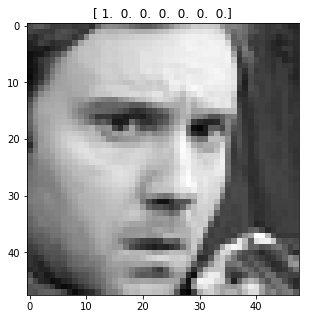

In [6]:
plt.figure(figsize=[5, 5])
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [7]:
X_train = X_train.reshape(-1, 48, 48, 1)
#X_val = X_val.reshape(-1, 48, 48, 1)
X_test = testing_input_face_images.reshape(-1, 48,48, 1)
y_test = testing_target_values
y_test = np_utils.to_categorical(testing_target_values)
print(y_test.shape, X_test.shape)

(3589, 7) (3589, 48, 48, 1)


In [8]:
X_train = X_train.astype('float32')
#X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
#X_train = X_train/255.0
#X_val = X_val/255.0
#X_test = X_test/255.0

In [9]:
print(y_train[:5])

[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]]


In [94]:
batch_size = 128
epochs = 100
num_classes = 7

In [95]:
model1 = Sequential()

#Deep model with less number of layers, lesser max-pools and small dense layers
#1st convolution layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))


model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))


model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))


model1.add(Flatten())
 
#fully connected layers
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.75))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

In [96]:
model2 = Sequential()


#1st convolution layer
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))


model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))


model2.add(Flatten())
 
#fully connected layers
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.6))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.6))
model2.add(Dense(num_classes, activation='softmax'))

In [97]:
model3 = Sequential()


#1st convolution layer
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model3.add(Dropout(0.5))


model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
#model3.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model3.add(Dropout(0.5))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))

model3.add(Conv2D(512, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(512, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))

model3.add(Flatten())
 
#fully connected layers
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.75))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

In [98]:
model4 = Sequential()


#1st convolution layer
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model4.add(Dropout(0.5))


model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model4.add(Dropout(0.5))

model4.add(Conv2D(128, (3, 3), activation='relu'))
#model4.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.6))

model4.add(Conv2D(256, (5, 5), activation='relu'))
#model4.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.6))


model4.add(Flatten())
 
#fully connected layers
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.6))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.6))
model4.add(Dense(num_classes, activation='softmax'))

In [99]:
model5 = Sequential()


#1st convolution layer
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model5.add(BatchNormalization())
#model5.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model5.add(Dropout(0.25))


model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(BatchNormalization())
#model5.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model5.add(Dropout(0.5))

model5.add(Conv2D(128, (5, 5), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Conv2D(256, (5, 5), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))


model5.add(Flatten())
 
#fully connected layers
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.75))
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

In [100]:
model6 = Sequential()


#1st convolution layer
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model6.add(BatchNormalization())
#model6.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model6.add(Dropout(0.4))


model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(BatchNormalization())
#model6.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model6.add(Dropout(0.75))

model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(BatchNormalization())
#model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model6.add(Dropout(0.75))

model6.add(Conv2D(256, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, (3, 3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model6.add(Dropout(0.75))

model6.add(Flatten())
 
#fully connected layers
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(num_classes, activation='softmax'))

In [101]:
model_list = [model1, model2, model3, model4, model5]

In [102]:
for ix in range(len(model_list)):
    model_list[ix].compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [103]:
for ix in range(len(model_list)):
    print('Model ', ix+1)
    model_list[ix].summary()
    print('\n\n\n')

Model  1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_115 (Bat (None, 46, 46, 32)        128       
_________________________________________________________________
dropout_80 (Dropout)         (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 44, 44, 64)        18496     
_________________________________________________________________
batch_normalization_116 (Bat (None, 44, 44, 64)        256       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 42, 42, 64)        36928     
_________________________________________________________________
batch_normalization_117 (Bat (None, 42, 42, 64)        256       
_

In [104]:
from keras.callbacks import ModelCheckpoint

In [105]:
checkpointer = []
train_model = []

In [106]:
face_model_path = 'face_model' + str(1) + '.h5'
checkpointer.append(ModelCheckpoint(filepath=face_model_path, verbose=1, save_best_only=True))
face_model_path = 'face_model' + str(2) + '.h5'
checkpointer.append(ModelCheckpoint(filepath=face_model_path, verbose=1, save_best_only=True))
face_model_path = 'face_model' + str(3) + '.h5'
checkpointer.append(ModelCheckpoint(filepath=face_model_path, verbose=1, save_best_only=True))
face_model_path = 'face_model' + str(4) + '.h5'
checkpointer.append(ModelCheckpoint(filepath=face_model_path, verbose=1, save_best_only=True))
face_model_path = 'face_model' + str(5) + '.h5'
checkpointer.append(ModelCheckpoint(filepath=face_model_path, verbose=1, save_best_only=True))
face_model_path = 'face_model' + str(6) + '.h5'
checkpointer.append(ModelCheckpoint(filepath=face_model_path, verbose=1, save_best_only=True))

In [107]:
print("Model no :", 1)
cur_model = model_list[0].fit(X_train, y_train,
                    batch_size=batch_size,epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer[0]])
train_model.append(cur_model)

Model no : 1
Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 88s - loss: 2.4116 - acc: 0.2065 - val_loss: 1.8033 - val_acc: 0.2494
Epoch 2/100
28709/28709 [==============================] - 69s - loss: 1.8850 - acc: 0.2418 - val_loss: 1.7661 - val_acc: 0.2502
Epoch 3/100
28709/28709 [==============================] - 69s - loss: 1.7995 - acc: 0.2671 - val_loss: 1.7123 - val_acc: 0.2853
Epoch 4/100
28709/28709 [==============================] - 69s - loss: 1.7217 - acc: 0.3057 - val_loss: 1.6182 - val_acc: 0.3502
Epoch 5/100
28709/28709 [==============================] - 69s - loss: 1.6691 - acc: 0.3387 - val_loss: 1.6083 - val_acc: 0.3553
Epoch 6/100
28709/28709 [==============================] - 69s - loss: 1.6225 - acc: 0.3594 - val_loss: 1.5561 - val_acc: 0.3709
Epoch 7/100
28709/28709 [==============================] - 68s - loss: 1.5675 - acc: 0.3818 - val_loss: 1.5825 - val_acc: 0.3647
Epoch 8/100
28709/28709 [==========

28709/28709 [==============================] - 68s - loss: 0.9784 - acc: 0.6323 - val_loss: 1.0886 - val_acc: 0.5893
Epoch 61/100
28709/28709 [==============================] - 69s - loss: 0.9716 - acc: 0.6335 - val_loss: 1.0399 - val_acc: 0.6177
Epoch 62/100
28709/28709 [==============================] - 68s - loss: 0.9812 - acc: 0.6343 - val_loss: 1.0590 - val_acc: 0.5993
Epoch 63/100
28709/28709 [==============================] - 69s - loss: 0.9665 - acc: 0.6393 - val_loss: 1.0246 - val_acc: 0.6172
Epoch 64/100
28709/28709 [==============================] - 68s - loss: 0.9640 - acc: 0.6360 - val_loss: 1.0496 - val_acc: 0.6110
Epoch 65/100
28709/28709 [==============================] - 68s - loss: 0.9599 - acc: 0.6431 - val_loss: 1.0256 - val_acc: 0.6138
Epoch 66/100
28709/28709 [==============================] - 68s - loss: 0.9476 - acc: 0.6426 - val_loss: 1.0374 - val_acc: 0.6186
Epoch 67/100
28709/28709 [==============================] - 69s - loss: 0.9514 - acc: 0.6404 - val_loss

In [108]:
print("Model no :", 2)
cur_model = model_list[1].fit(X_train, y_train,
                    batch_size=batch_size,epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer[1]])
train_model.append(cur_model)

Model no : 2
Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 34s - loss: 1.9995 - acc: 0.2124 - val_loss: 1.8117 - val_acc: 0.2494
Epoch 2/100
28709/28709 [==============================] - 18s - loss: 1.8328 - acc: 0.2472 - val_loss: 1.8008 - val_acc: 0.2494
Epoch 3/100
28709/28709 [==============================] - 18s - loss: 1.8185 - acc: 0.2498 - val_loss: 1.7941 - val_acc: 0.2491
Epoch 4/100
28709/28709 [==============================] - 18s - loss: 1.8057 - acc: 0.2530 - val_loss: 1.8069 - val_acc: 0.2491
Epoch 5/100
28709/28709 [==============================] - 18s - loss: 1.7883 - acc: 0.2589 - val_loss: 1.7471 - val_acc: 0.2767
Epoch 6/100
28709/28709 [==============================] - 18s - loss: 1.7572 - acc: 0.2776 - val_loss: 1.6970 - val_acc: 0.2990
Epoch 7/100
28709/28709 [==============================] - 18s - loss: 1.7286 - acc: 0.2945 - val_loss: 1.7197 - val_acc: 0.2956
Epoch 8/100
28709/28709 [==========

28709/28709 [==============================] - 18s - loss: 1.3355 - acc: 0.4941 - val_loss: 1.4084 - val_acc: 0.4843
Epoch 31/100
28709/28709 [==============================] - 18s - loss: 1.3309 - acc: 0.4933 - val_loss: 1.2386 - val_acc: 0.5174
Epoch 32/100
28709/28709 [==============================] - 18s - loss: 1.3265 - acc: 0.4976 - val_loss: 1.2686 - val_acc: 0.5113
Epoch 33/100
28709/28709 [==============================] - 18s - loss: 1.3210 - acc: 0.4979 - val_loss: 1.2574 - val_acc: 0.5082
Epoch 34/100
28709/28709 [==============================] - 18s - loss: 1.3114 - acc: 0.5021 - val_loss: 1.3248 - val_acc: 0.4812
Epoch 35/100
28709/28709 [==============================] - 18s - loss: 1.3107 - acc: 0.5030 - val_loss: 1.3052 - val_acc: 0.4829
Epoch 36/100
28709/28709 [==============================] - 18s - loss: 1.3009 - acc: 0.5058 - val_loss: 1.2915 - val_acc: 0.5054
Epoch 37/100
28709/28709 [==============================] - 18s - loss: 1.2976 - acc: 0.5096 - val_loss

28709/28709 [==============================] - 18s - loss: 1.2168 - acc: 0.5430 - val_loss: 1.1557 - val_acc: 0.5570
Epoch 62/100
28709/28709 [==============================] - 18s - loss: 1.2241 - acc: 0.5384 - val_loss: 1.1791 - val_acc: 0.5495
Epoch 63/100
28709/28709 [==============================] - 18s - loss: 1.2202 - acc: 0.5382 - val_loss: 1.1740 - val_acc: 0.5536
Epoch 64/100
28709/28709 [==============================] - 18s - loss: 1.2144 - acc: 0.5428 - val_loss: 1.1719 - val_acc: 0.5478
Epoch 65/100
28709/28709 [==============================] - 18s - loss: 1.2179 - acc: 0.5427 - val_loss: 1.1460 - val_acc: 0.5592
Epoch 66/100
28709/28709 [==============================] - 18s - loss: 1.2090 - acc: 0.5443 - val_loss: 1.1198 - val_acc: 0.5687
Epoch 67/100
28709/28709 [==============================] - 18s - loss: 1.2109 - acc: 0.5424 - val_loss: 1.1629 - val_acc: 0.5589
Epoch 68/100
28709/28709 [==============================] - 18s - loss: 1.2079 - acc: 0.5442 - val_loss

28709/28709 [==============================] - 18s - loss: 1.1834 - acc: 0.5570 - val_loss: 1.1376 - val_acc: 0.5756
Epoch 94/100
28709/28709 [==============================] - 18s - loss: 1.1802 - acc: 0.5547 - val_loss: 1.1110 - val_acc: 0.5704
Epoch 95/100
28709/28709 [==============================] - 18s - loss: 1.1822 - acc: 0.5548 - val_loss: 1.1141 - val_acc: 0.5712
Epoch 96/100
28709/28709 [==============================] - 18s - loss: 1.1817 - acc: 0.5579 - val_loss: 1.1640 - val_acc: 0.5520
Epoch 97/100
28709/28709 [==============================] - 18s - loss: 1.1782 - acc: 0.5555 - val_loss: 1.1533 - val_acc: 0.5631
Epoch 98/100
28709/28709 [==============================] - 18s - loss: 1.1757 - acc: 0.5564 - val_loss: 1.1183 - val_acc: 0.5731
Epoch 99/100
28709/28709 [==============================] - 18s - loss: 1.1786 - acc: 0.5576 - val_loss: 1.1396 - val_acc: 0.5676
Epoch 100/100
28709/28709 [==============================] - 18s - loss: 1.1716 - acc: 0.5586 - val_los

In [109]:
print("Model no :", 3)
cur_model = model_list[2].fit(X_train, y_train,
                    batch_size=batch_size,epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer[2]])
train_model.append(cur_model)

Model no : 3
Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 61s - loss: 1.9990 - acc: 0.2113 - val_loss: 1.8205 - val_acc: 0.2494
Epoch 2/100
28709/28709 [==============================] - 42s - loss: 1.8375 - acc: 0.2458 - val_loss: 1.8090 - val_acc: 0.2494
Epoch 3/100
28709/28709 [==============================] - 42s - loss: 1.8157 - acc: 0.2535 - val_loss: 1.7988 - val_acc: 0.2508
Epoch 4/100
28709/28709 [==============================] - 42s - loss: 1.7699 - acc: 0.2758 - val_loss: 1.7407 - val_acc: 0.2817
Epoch 5/100
28709/28709 [==============================] - 42s - loss: 1.7154 - acc: 0.2968 - val_loss: 1.6860 - val_acc: 0.2959
Epoch 6/100
28709/28709 [==============================] - 42s - loss: 1.6630 - acc: 0.3169 - val_loss: 1.5700 - val_acc: 0.3742
Epoch 7/100
28709/28709 [==============================] - 42s - loss: 1.6187 - acc: 0.3490 - val_loss: 1.5152 - val_acc: 0.4124
Epoch 8/100
28709/28709 [==========

28709/28709 [==============================] - 42s - loss: 0.8064 - acc: 0.7119 - val_loss: 1.1820 - val_acc: 0.6116
Epoch 62/100
28709/28709 [==============================] - 42s - loss: 0.8038 - acc: 0.7141 - val_loss: 1.2092 - val_acc: 0.6077
Epoch 63/100
28709/28709 [==============================] - 42s - loss: 0.7892 - acc: 0.7181 - val_loss: 1.2281 - val_acc: 0.6080
Epoch 64/100
28709/28709 [==============================] - 42s - loss: 0.7768 - acc: 0.7221 - val_loss: 1.2285 - val_acc: 0.6119
Epoch 65/100
28709/28709 [==============================] - 42s - loss: 0.7680 - acc: 0.7262 - val_loss: 1.2514 - val_acc: 0.6121
Epoch 66/100
28709/28709 [==============================] - 42s - loss: 0.7642 - acc: 0.7320 - val_loss: 1.2826 - val_acc: 0.6057
Epoch 67/100
28709/28709 [==============================] - 42s - loss: 0.7617 - acc: 0.7303 - val_loss: 1.2277 - val_acc: 0.6091
Epoch 68/100
28709/28709 [==============================] - 42s - loss: 0.7437 - acc: 0.7369 - val_loss

In [110]:
print("Model no :", 4)
cur_model = model_list[3].fit(X_train, y_train,
                    batch_size=batch_size,epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer[3]])
train_model.append(cur_model)

Model no : 4
Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 31s - loss: 2.2596 - acc: 0.2128 - val_loss: 1.8201 - val_acc: 0.2494
Epoch 2/100
28709/28709 [==============================] - 18s - loss: 1.8432 - acc: 0.2492 - val_loss: 1.7846 - val_acc: 0.2558
Epoch 3/100
28709/28709 [==============================] - 18s - loss: 1.8027 - acc: 0.2620 - val_loss: 1.7432 - val_acc: 0.2750
Epoch 4/100
28709/28709 [==============================] - 18s - loss: 1.7656 - acc: 0.2810 - val_loss: 1.7221 - val_acc: 0.2817
Epoch 5/100
28709/28709 [==============================] - 18s - loss: 1.7223 - acc: 0.3023 - val_loss: 1.6431 - val_acc: 0.3480
Epoch 6/100
28709/28709 [==============================] - 18s - loss: 1.6796 - acc: 0.3234 - val_loss: 1.6593 - val_acc: 0.3221
Epoch 7/100
28709/28709 [==============================] - 18s - loss: 1.6521 - acc: 0.3373 - val_loss: 1.6611 - val_acc: 0.3363
Epoch 8/100
28709/28709 [==========

28709/28709 [==============================] - 18s - loss: 1.3474 - acc: 0.4848 - val_loss: 1.2658 - val_acc: 0.5093
Epoch 31/100
28709/28709 [==============================] - 18s - loss: 1.3412 - acc: 0.4864 - val_loss: 1.2532 - val_acc: 0.5135
Epoch 32/100
28709/28709 [==============================] - 18s - loss: 1.3351 - acc: 0.4914 - val_loss: 1.2701 - val_acc: 0.5163
Epoch 33/100
28709/28709 [==============================] - 18s - loss: 1.3281 - acc: 0.4947 - val_loss: 1.2322 - val_acc: 0.5361
Epoch 34/100
28709/28709 [==============================] - 18s - loss: 1.3238 - acc: 0.4932 - val_loss: 1.2102 - val_acc: 0.5391
Epoch 35/100
28709/28709 [==============================] - 18s - loss: 1.3220 - acc: 0.4918 - val_loss: 1.3011 - val_acc: 0.5068
Epoch 36/100
28709/28709 [==============================] - 18s - loss: 1.3200 - acc: 0.4968 - val_loss: 1.2082 - val_acc: 0.5500
Epoch 37/100
28709/28709 [==============================] - 18s - loss: 1.3065 - acc: 0.5054 - val_loss

28709/28709 [==============================] - 18s - loss: 1.0970 - acc: 0.5901 - val_loss: 1.0625 - val_acc: 0.5971
Epoch 92/100
28709/28709 [==============================] - 18s - loss: 1.0966 - acc: 0.5951 - val_loss: 1.0771 - val_acc: 0.6021
Epoch 93/100
28709/28709 [==============================] - 18s - loss: 1.0899 - acc: 0.5961 - val_loss: 1.0798 - val_acc: 0.5946
Epoch 94/100
28709/28709 [==============================] - 18s - loss: 1.0878 - acc: 0.5918 - val_loss: 1.0633 - val_acc: 0.6060
Epoch 95/100
28709/28709 [==============================] - 18s - loss: 1.0901 - acc: 0.5940 - val_loss: 1.0889 - val_acc: 0.5896
Epoch 96/100
28709/28709 [==============================] - 18s - loss: 1.0821 - acc: 0.5955 - val_loss: 1.1493 - val_acc: 0.5720
Epoch 97/100
28709/28709 [==============================] - 18s - loss: 1.0792 - acc: 0.5958 - val_loss: 1.0464 - val_acc: 0.6116
Epoch 98/100
28709/28709 [==============================] - 18s - loss: 1.0702 - acc: 0.5972 - val_loss

In [111]:
print("Model no :", 5)
cur_model = model_list[4].fit(X_train, y_train,
                    batch_size=batch_size,epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer[4]])
train_model.append(cur_model)

Model no : 5
Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 90s - loss: 3.0380 - acc: 0.2065 - val_loss: 1.8551 - val_acc: 0.1962
Epoch 2/100
28709/28709 [==============================] - 76s - loss: 1.9254 - acc: 0.2480 - val_loss: 1.8026 - val_acc: 0.2611
Epoch 3/100
28709/28709 [==============================] - 76s - loss: 1.7639 - acc: 0.2881 - val_loss: 1.6633 - val_acc: 0.2909
Epoch 4/100
28709/28709 [==============================] - 76s - loss: 1.6788 - acc: 0.3271 - val_loss: 1.6778 - val_acc: 0.3391
Epoch 5/100
28709/28709 [==============================] - 76s - loss: 1.6171 - acc: 0.3627 - val_loss: 1.6571 - val_acc: 0.3402
Epoch 6/100
28709/28709 [==============================] - 76s - loss: 1.5795 - acc: 0.3748 - val_loss: 1.5569 - val_acc: 0.3795
Epoch 7/100
28709/28709 [==============================] - 76s - loss: 1.5453 - acc: 0.3906 - val_loss: 1.4873 - val_acc: 0.4104
Epoch 8/100
28709/28709 [==========

28709/28709 [==============================] - 75s - loss: 0.7626 - acc: 0.7221 - val_loss: 1.0884 - val_acc: 0.6057
Epoch 61/100
28709/28709 [==============================] - 75s - loss: 0.7522 - acc: 0.7260 - val_loss: 1.0802 - val_acc: 0.6052
Epoch 62/100
28709/28709 [==============================] - 75s - loss: 0.7387 - acc: 0.7335 - val_loss: 1.1009 - val_acc: 0.6160
Epoch 63/100
28709/28709 [==============================] - 75s - loss: 0.7501 - acc: 0.7286 - val_loss: 1.0864 - val_acc: 0.6010
Epoch 64/100
28709/28709 [==============================] - 76s - loss: 0.7434 - acc: 0.7328 - val_loss: 1.0840 - val_acc: 0.6108
Epoch 65/100
28709/28709 [==============================] - 75s - loss: 0.7232 - acc: 0.7400 - val_loss: 1.1042 - val_acc: 0.6135
Epoch 66/100
28709/28709 [==============================] - 75s - loss: 0.7082 - acc: 0.7438 - val_loss: 1.0773 - val_acc: 0.6091
Epoch 67/100
28709/28709 [==============================] - 75s - loss: 0.7017 - acc: 0.7472 - val_loss

28709/28709 [==============================] - 75s - loss: 0.5587 - acc: 0.8041 - val_loss: 1.1152 - val_acc: 0.6280
Epoch 93/100
28709/28709 [==============================] - 75s - loss: 0.5526 - acc: 0.8055 - val_loss: 1.0966 - val_acc: 0.6261
Epoch 94/100
28709/28709 [==============================] - 75s - loss: 0.5373 - acc: 0.8103 - val_loss: 1.0834 - val_acc: 0.6289
Epoch 95/100
28709/28709 [==============================] - 75s - loss: 0.5527 - acc: 0.8042 - val_loss: 1.0878 - val_acc: 0.6283
Epoch 96/100
28709/28709 [==============================] - 75s - loss: 0.5491 - acc: 0.8068 - val_loss: 1.1180 - val_acc: 0.6222
Epoch 97/100
28709/28709 [==============================] - 75s - loss: 0.5344 - acc: 0.8127 - val_loss: 1.1257 - val_acc: 0.6213
Epoch 98/100
28709/28709 [==============================] - 75s - loss: 0.5373 - acc: 0.8108 - val_loss: 1.0968 - val_acc: 0.6261
Epoch 99/100
28709/28709 [==============================] - 75s - loss: 0.5197 - acc: 0.8176 - val_loss

In [113]:
model_json = []
for ix in range(len(model_list)-1):
    model_json.append(model_list[ix].to_json())
    json_path = "face_model" + str(ix+1) + ".json"
    with open(json_path, "w") as json_file:
        json_file.write(model_json[ix])

In [114]:
y_pred = []
for ix in range(5):
    y_cur = model_list[ix].predict(X_test, verbose=0)
    y_pred.append(y_cur)

In [115]:
#Winning expression by max value
correct = 0.0
for ix in range(len(X_test)):
    max_idx, max_val = -1, -1
    for iy in range(5):
        cur_arr = np.array(y_pred[iy][ix])
        x = np.argmax(cur_arr)
        if max_val < cur_arr[x]:
            max_idx, max_val = x, cur_arr[x]
    if max_idx == np.argmax(y_test[ix]):
        correct += 1
correct = correct/len(X_test)
print(correct*100)

64.41905823349123


In [116]:
#Winning value by maximum number of selection by different models
correct = 0.0
for ix in range(len(X_test)):
    val_count = np.zeros(shape=(7, ))
    for iy in range(5):
        cur_arr = np.array(y_pred[iy][ix])
        x = np.argmax(cur_arr)
        val_count[x] += 1
    
    #print(max_idx, np.argmax(val_count))    
    if np.argmax(y_test[ix]) == np.argmax(val_count):
        correct += 1
correct = correct/len(X_test)
print(correct*100)

64.25188074672612
